Your Name and PRN:
- Name :     Tulsi Mundada
- PRN  :     240340128035
- Date :     16/05/2024

# Image Processing with Neural Network
## Assignment 02


## Take Perceptron implementation notebook and add sigmoid activation function

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , classification_report

In [5]:
RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [6]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [7]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


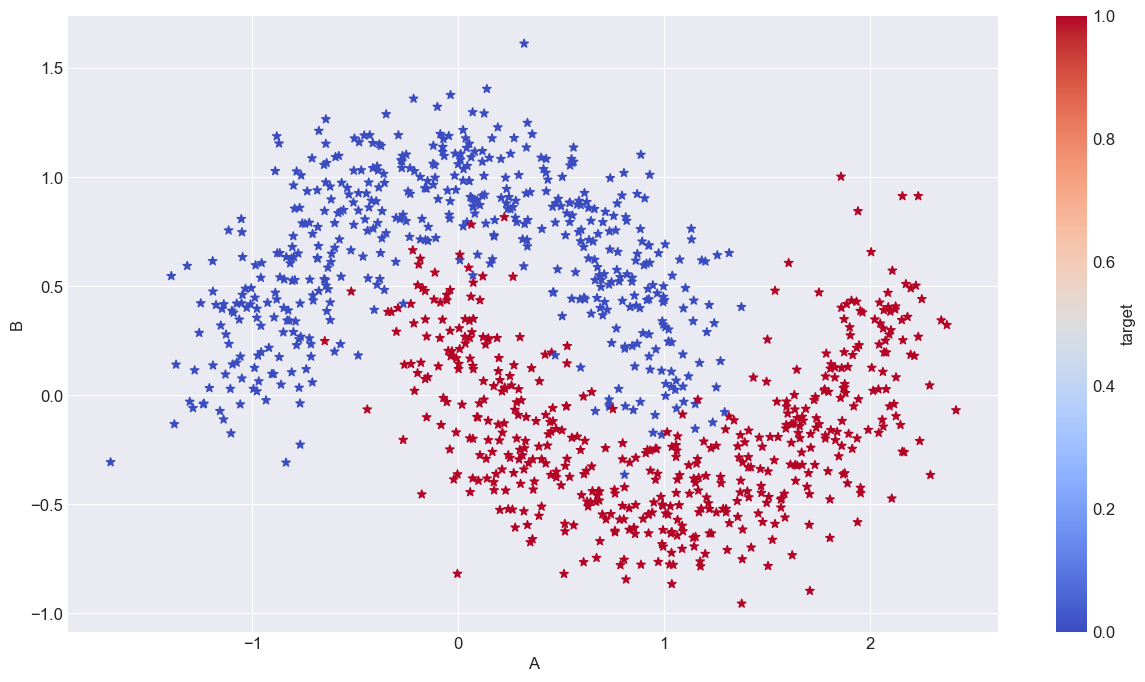

In [8]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP); 

In [9]:
data_train , data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]

In [10]:

def predict (row, weights):
    z = weights[0]
    for i in range(len(row)-1):
        z += weights[i + 1] * row[i]
    a=1/(1+np.exp(-z))
    return a

In [11]:
wghts = np.array([0.1,2.0,1.0])

predict(data_train[0],wghts)

0.9434999754763397

In [15]:
def train_weights(train,n_epochs,alpha):

    errors = []
    weights = rng.random(train.shape[1])
    m = train.shape[0]

    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train:
            prediction = predict(row,weights)
            dz = prediction - row[-1] 
            sum_error += row[-1]*np.log(prediction)
            weights[0] = weights[0] - alpha * dz / m

            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m

        errors.append(sum_error/m)

    return errors,weights

In [16]:
errors , weights= train_weights(data_train,EPOCHS,ALPHA)

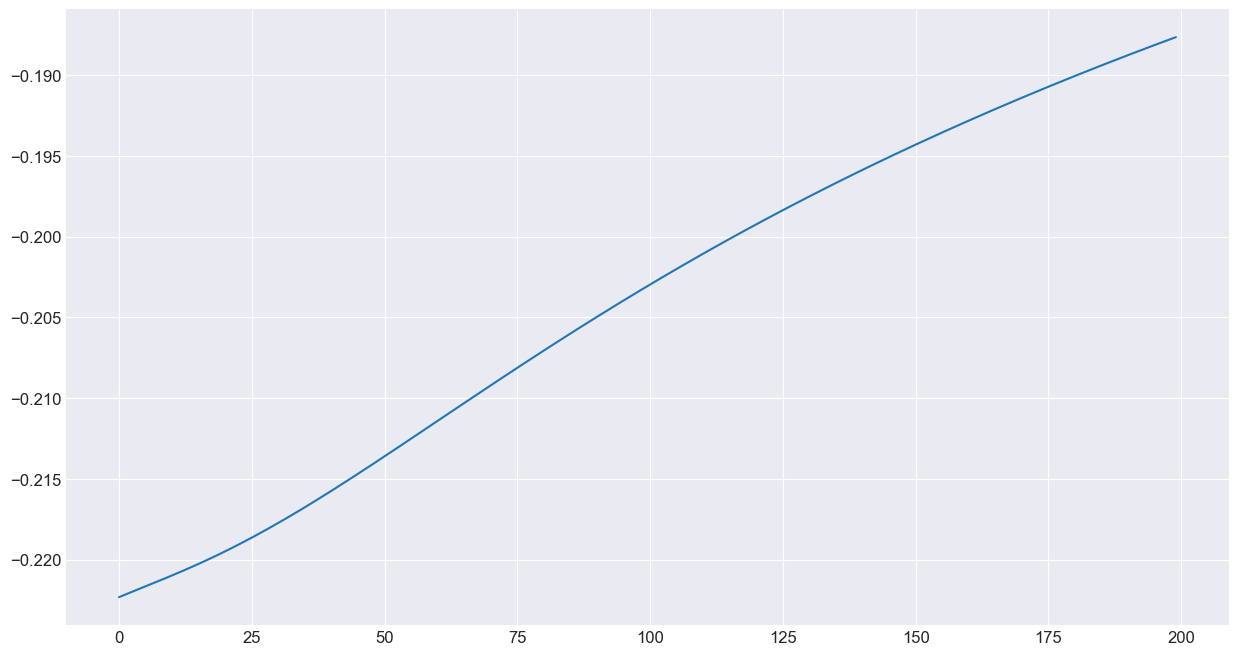

In [17]:
fig,ax = plt.subplots()
ax.plot(errors)

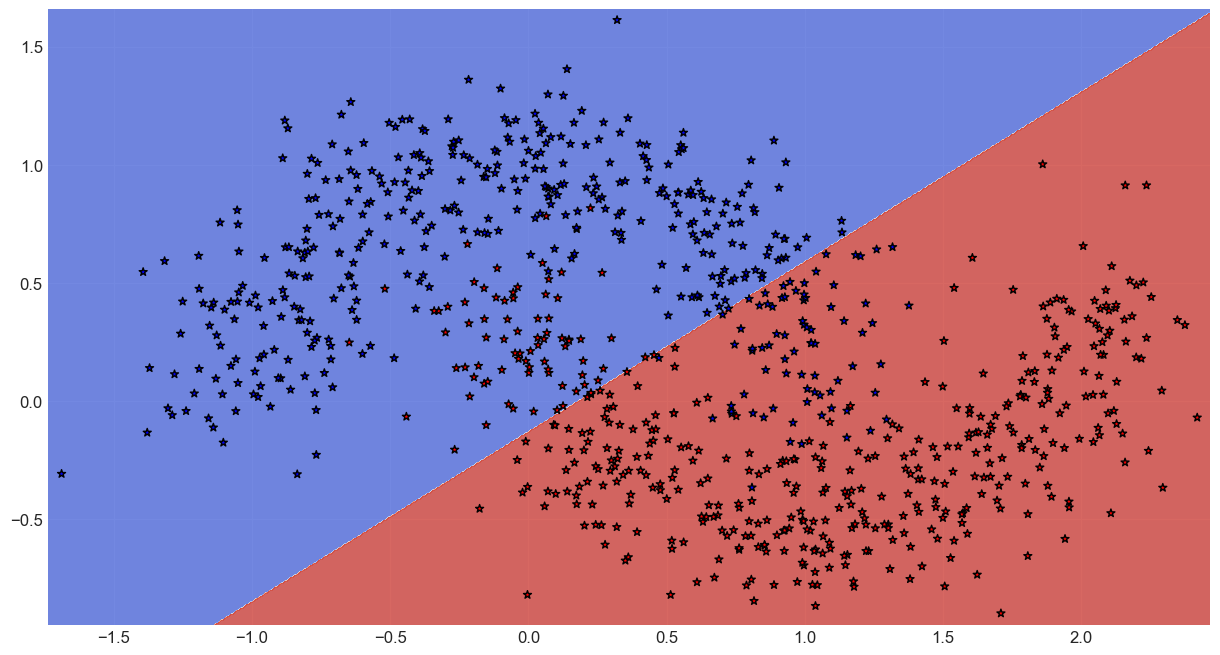

In [18]:
X = data_train
fig,ax = plt.subplots()
dm =0.005
x_min , x_max = X[:,0].min() - 0.05 , X[:, 0].max() + 0.05
y_min , y_max = X[:,1].min() - 0.05 , X[:, 1].max() + 0.05

xx , yy  = np.meshgrid(np.arange(x_min,x_max,dm),
                       np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0] , 1))))

y_pred = []

for row in XX:
    pred = predict(row , weights)
    round_y = 1 if pred >= 0.5 else 0
    y_pred.append(round_y)
z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,z ,cmap = CMAP , alpha =0.8)
ax.scatter(X[:,0], X[:,1],c=X[:,2],
           edgecolors='k',
           marker='*',
           cmap=plt.cm.bwr)

In [ ]:
Activation function: sigmoid, Test Accuracy: 0.9809203147888184
Activation function: tanh, Test Accuracy: 0.9943883419036865
Activation function: relu, Test Accuracy: 1.0
Number of neurons: 32, Test Accuracy: 0.9943883419036865
Number of neurons: 16, Test Accuracy: 0.9943883419036865
Number of neurons: 8, Test Accuracy: 0.9809203147888184
Number of hidden layers: 3, Test Accuracy: 1.0
Number of hidden layers: 2, Test Accuracy: 1.0
Number of hidden layers: 1, Test Accuracy: 0.9943883419036865
Learning rate: 0.01, Test Accuracy: 1.0
Learning rate: 0.005, Test Accuracy: 1.0
Learning rate: 0.001, Test Accuracy: 1.0

In [19]:
#accuracy for train
predictions =[]
for row in data_train:
 pred = predict(row , weights)
 predictions.append(np.round(pred))
accuracy_score(data_train[:,-1],predictions)

0.8288888888888889

In [20]:
#accuracy for test
predictions =[]
for row in data_test:
 pred = predict(row , weights)
 predictions.append(np.round(pred))
accuracy_score(data_test[:,-1],predictions)

0.89

In [21]:
cm = confusion_matrix(data_test[:,-1],predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

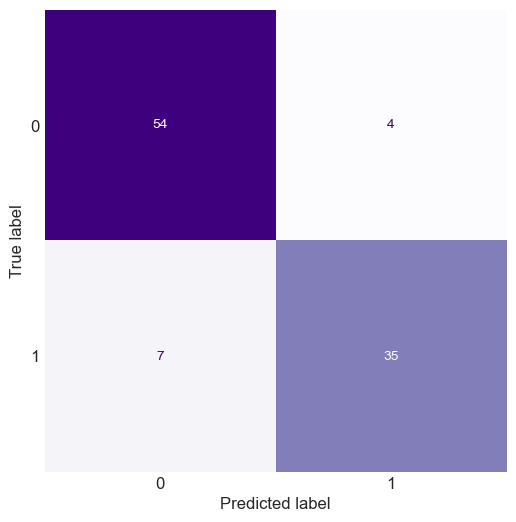

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels= [0,1])
fig,ax = plt.subplots(figsize =(6,6))
disp.plot(ax=ax , cmap = "Purples" ,colorbar=False)
ax.grid(False)